<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Typical-examples-of-time-series-forecasting" data-toc-modified-id="Typical-examples-of-time-series-forecasting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Typical examples of time series forecasting</a></span></li><li><span><a href="#Main-components" data-toc-modified-id="Main-components-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Main components</a></span></li><li><span><a href="#Stationarity" data-toc-modified-id="Stationarity-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Stationarity</a></span></li><li><span><a href="#Time-series-analysis" data-toc-modified-id="Time-series-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Time series analysis</a></span><ul class="toc-item"><li><span><a href="#Time-series-plotting" data-toc-modified-id="Time-series-plotting-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Time series plotting</a></span></li><li><span><a href="#Seasonal-plotting" data-toc-modified-id="Seasonal-plotting-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Seasonal plotting</a></span></li></ul></li></ul></div>

[Link to Time Series Slides](https://www.canva.com/design/DAD9BMIZGlA/HaTWZviUAKw923gwDBHEmg/view?utm_content=DAD9BMIZGlA&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink#7)

## Typical examples of time series forecasting

 * demand and sales
 * number of visitors to a website
 * stock prices

## Main components

Main components of a time series are:
 * Trend
 * Seasonality
 * Cycles
 * Irregular components

Many people confuse cyclic behaviour with seasonal behaviour, but they are really quite different:
 * If the fluctuations are not of a fixed frequency then they are cyclic
 * If the frequency is unchanging and associated with some aspect of the calendar, then the pattern is seasonal
 * In general, the average **length of cycles is longer** than the length of a seasonal pattern
 * In general, the **magnitudes of cycles tend to be more variable** than the magnitudes of seasonal patterns.

What can we identify here?

<img src="https://otexts.com/fpp2/fpp_files/figure-html/fourexamples-1.png" width=1000>

1. (top left) The monthly housing sales in the US shows:
 * no trend
 * strong seasonality within each year
 * some strong cyclic behaviour with a period of about 6–10 years

2. (top right) The US treasury bill contracts shows results from the Chicago market for 100 consecutive trading days in 1981. Here, there is:
 * obvious downward trend
 * no seasonality
 * no cyclic behavior

3. (bottom left) The Australian quarterly electricity production shows:
 * a strong increasing trend
 * strong seasonality
 * no cyclic behaviour here.

4. (bottom right) The daily change in the Google closing stock price has:
 * no trend
 * no seasonality
 * no cyclic behaviour
 * random fluctuations which do not appear to be very predictable

## Stationarity

Stationary: 
 * mean is constant along time (no trend)
 * variance is constant

Weakly stationary: 
 * mean is constant along time (no trend)
 * variance is **not** constant along time

<img src="https://www.machinelearningplus.com/wp-content/uploads/2019/02/stationary-and-non-stationary-time-series.png" width=1000>

## Time series analysis

In [7]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

from dateutil.parser import parse 

### Time series plotting

In [8]:
# import Australian drugs time series dataframe
df = pd.read_csv(
    'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', 
    parse_dates=['date'],
    #index_col='date'
)

It is a monthly time series

In [13]:
df.shape

(204, 2)

In [14]:
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


Lets plot the time series!

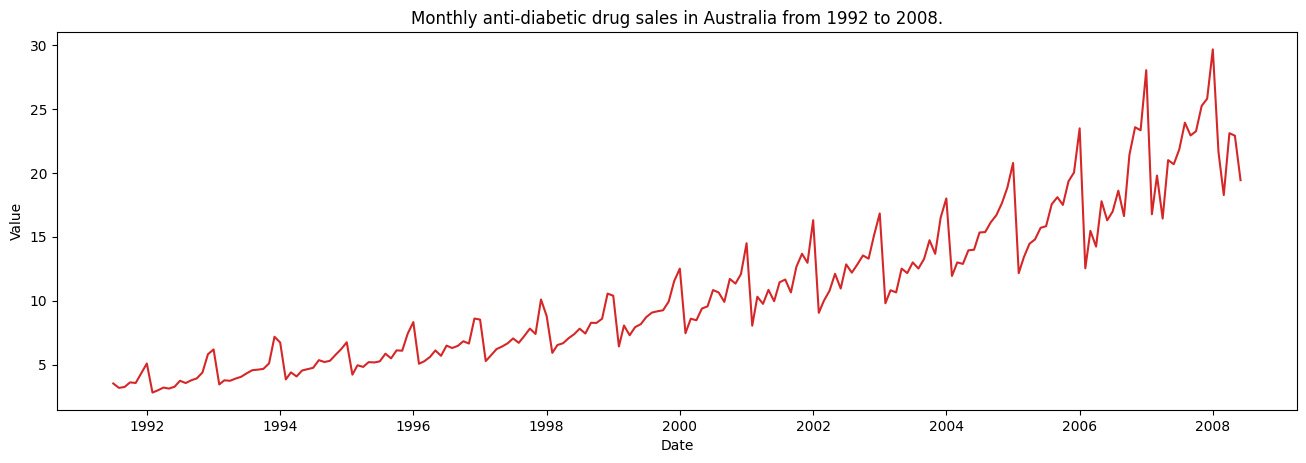

In [18]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.date, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')    

### Seasonal plotting

There is clearly a yearly seasonality, lets explore it

Lets create new columns year, month

In [24]:
df.head()

,date,value,year
0,1991-07-01,3.526591,1991
1,1991-08-01,3.180891,1991
2,1991-09-01,3.252221,1991
3,1991-10-01,3.611003,1991
4,1991-11-01,3.565869,1991


In [22]:
df['year'] = df.date.dt.year

In [23]:
years = df['year'].unique()

In [25]:
years

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008])

In [29]:
df.date[0]

Timestamp('1991-07-01 00:00:00')

In [30]:
_.strftime("%b")

'Jul'

In [31]:
df['month'] = [d.strftime('%b') for d in df.date]

In [32]:
df.head()

,date,value,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov


Lets plot all years alltoguether to observe seasonality

In [34]:
colors = mpl.colors.XKCD_COLORS.keys()

In [39]:
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

In [40]:
mycolors

array(['xkcd:key lime', 'xkcd:deep rose', 'xkcd:cerise', 'xkcd:pale teal',
       'xkcd:bluey purple', 'xkcd:vibrant green',
       'xkcd:macaroni and cheese', 'xkcd:clay', 'xkcd:light yellow green',
       'xkcd:blurple', 'xkcd:shamrock green', 'xkcd:burgundy',
       'xkcd:green blue', 'xkcd:dark plum', 'xkcd:vivid green',
       'xkcd:military green', 'xkcd:poo', 'xkcd:brick'], dtype='<U31')

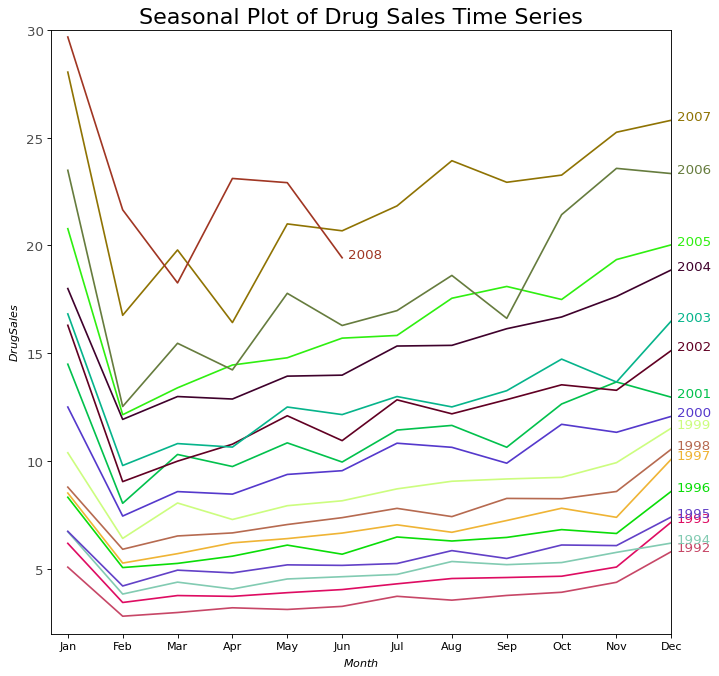

In [41]:
plt.figure(figsize=(10,10), dpi= 80)

for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df[df.year==y], color=mycolors[i], label=y)
        plt.text(
            df[df.year==y].shape[0]-.9, 
            df[df.year==y].value[-1:].values[0], 
            y, 
            fontsize=12, 
            color=mycolors[i]
        )

plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

We can see the following:
 * There is a steep fall in drug sales every February
 * Clearly, the pattern repeats within a given year, every year

 * As years progress, the drug sales increase overall

In [42]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

<AxesSubplot:xlabel='year', ylabel='value'>

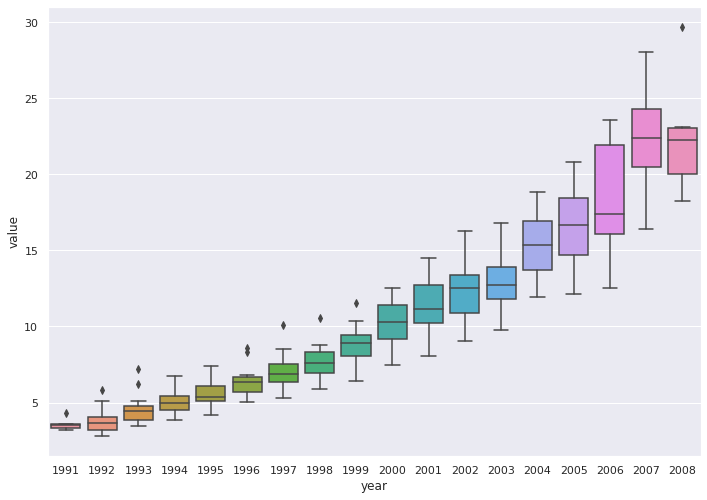

In [43]:
sns.boxplot(y=df.value, x=df.year.astype(str))